# Participation to co-creation: tools and methods for the involvement of stakeholders in mobility planning in Germany

#### Libraries

In [1]:
# loading libraries
import pandas as pd
from ast import literal_eval
import itertools
from apyori import apriori
import networkx as nx  
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

#### Functions

In [2]:
# function to calculate intersections between two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [3]:
# function to concatenate three lists in all possible combinations
def concatenation(lst1, lst2, lst3):
    a = [lst1, lst2, lst3]
    return list(itertools.product(*a))

#### Data import / preparation

In [4]:
df = pd.read_csv("SUMP_codes_clean.csv", index_col=0)
df.head()

,Number,Merge,Text Content,Document,Codes,id
0,1:1,1,involvement and participation of citizens and ...,Aachen-SUMP-Partizipation-2016.pdf,"citizens and wider public, increase user accep...",Aachen-SUMP-Partizipation-2016.pdf_1
1,1:2,1,"Aachen (Germany), Gdynia (Poland), Koprivnica ...",Aachen-SUMP-Partizipation-2016.pdf,"increase user acceptance / legitimacy, online_...",Aachen-SUMP-Partizipation-2016.pdf_1
2,1:4,2,The involvement of citizens obliges transport ...,Aachen-SUMP-Partizipation-2016.pdf,citizens and wider public,Aachen-SUMP-Partizipation-2016.pdf_2
3,1:5,2,This is a good example of how projects “coming...,Aachen-SUMP-Partizipation-2016.pdf,"increase user acceptance / legitimacy,",Aachen-SUMP-Partizipation-2016.pdf_2
4,1:6,2,A mobility vision for the year 2050 in Aachen ...,Aachen-SUMP-Partizipation-2016.pdf,"decision-makers / political authorities, envis...",Aachen-SUMP-Partizipation-2016.pdf_2


In [5]:
df.shape

(272, 6)

In [6]:
# create 3 list with the main categories: Target groups
# annotation: In order to facilitate the string comparison,
# the target group "decision-makers, political authorities" has been changed to "decision-makers / political authorities"
target_groups_list = ["social organisations / public interest groups", "young and children", "users",
                      "senior citizens", "citizens and wider public", "multiplicators",
                      "transport providers and operators / public services like energy", "non defined stakeholders",
                      "researchers", "regional actors", "private business / economy", "political actors / district committees",
                      "networks and associations", "municipal employees / members of the public administration",
                      "experts-practitioners-planers", "decision-makers / political authorities",
                      "Committees representing public interests", "consultants"]

In [7]:
# create 3 list with the main categories: Methods
# annotations: In order to facilitate the string comparison,
# the method online questionnaire/ survey has been changed to online_questionnaire_survey
methods_list = ["co-creation workshop", "meetings", "working group", "stakeholder workshops", "visualisation methods", "round table", "scenario development", "citizen workshop / citizen forum", "advisory board", "focus group", "interviews", "survey", "expert forum / expert workshop", "city walks / city tours", "citizen contest", "conferences / symposium", "stalls / market fairs", "exhibition / event / presentation", "press / marketing / public relations / communication", "online public events", "social networks", "online platform", "online_questionnaire_zurvey", "online communication"]

In [8]:
# create 3 list with the main categories: Goals
goals_list = ["communication / transparency", "envisioning / common ground", "feedback / discussion", "ideation / innovation", "increase user acceptance / legitimacy", "project management", "understand users / user behavior / requirements"]

In [9]:
# since a single activity is splitted in multiple text blocks, groupby following the id column
df = df.groupby(['id'])['Codes'].apply(lambda x: ','.join(x)).reset_index()
df.head()

,id,Codes
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept..."
2,Aachen-SUMP-Partizipation-2016.pdf_3,"citizen workshop / citizen forum, citizens and..."
3,Aachen-SUMP-Partizipation-2016.pdf_4,"citizens and wider public, feedback / discussi..."
4,Aachen-SUMP-Partizipation-2016.pdf_5,"citizens and wider public, communication / tra..."


In [10]:
# check if the codes contains at least one target group
found = [df['Codes'].str.contains(x) for x in target_groups_list]
result = pd.DataFrame(found)
result_t = result.T
result_t['contains_a_target_group'] = result_t.any(axis = 1)
df['contains_a_target_group'] = result_t['contains_a_target_group']  

# check if the codes contains at least one method
found = [df['Codes'].str.contains(x) for x in methods_list]
result = pd.DataFrame(found)
result_t = result.T
result_t['contains_a_method'] = result_t.any(axis = 1)
df['contains_a_method'] = result_t['contains_a_method']

# check if the codes contains at least one goal
found = [df['Codes'].str.contains(x) for x in goals_list]
result = pd.DataFrame(found)
result_t = result.T
result_t['contains_a_goal'] = result_t.any(axis = 1)
df['contains_a_goal'] = result_t['contains_a_goal']

# check if at least one of methods and target groups is missing
df['all_three_present'] = df[['contains_a_method', 'contains_a_target_group', 'contains_a_goal']].all(axis=1)

# remove rows the all_three_present is not true
df = df[df['all_three_present'] == True]
df.head()

,id,Codes,contains_a_target_group,contains_a_method,contains_a_goal,all_three_present
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...",True,True,True,True
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...",True,True,True,True
2,Aachen-SUMP-Partizipation-2016.pdf_3,"citizen workshop / citizen forum, citizens and...",True,True,True,True
3,Aachen-SUMP-Partizipation-2016.pdf_4,"citizens and wider public, feedback / discussi...",True,True,True,True
4,Aachen-SUMP-Partizipation-2016.pdf_5,"citizens and wider public, communication / tra...",True,True,True,True


In [11]:
# How many activities do we have in the dataset?
df.shape

(176, 6)

In [12]:
# apply function in order to intersecate list of goals, methods and target groups with codes and separate them
# methods
df['Methods_applied'] = df.apply(lambda row: intersection(methods_list,row['Codes']),axis=1)

# target groups
df['Target_groups_involved'] = df.apply(lambda row: intersection(target_groups_list,row['Codes']),axis=1)

# goals
df['Goals_pursued'] = df.apply(lambda row: intersection(goals_list,row['Codes']),axis=1)
df.head()

,id,Codes,contains_a_target_group,contains_a_method,contains_a_goal,all_three_present,Methods_applied,Target_groups_involved,Goals_pursued
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...",True,True,True,True,[online_questionnaire_zurvey],"[citizens and wider public, non defined stakeh...",[increase user acceptance / legitimacy]
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...",True,True,True,True,[scenario development],"[citizens and wider public, non defined stakeh...","[envisioning / common ground, increase user ac..."
2,Aachen-SUMP-Partizipation-2016.pdf_3,"citizen workshop / citizen forum, citizens and...",True,True,True,True,"[visualisation methods, scenario development, ...",[citizens and wider public],[feedback / discussion]
3,Aachen-SUMP-Partizipation-2016.pdf_4,"citizens and wider public, feedback / discussi...",True,True,True,True,[online_questionnaire_zurvey],[citizens and wider public],[feedback / discussion]
4,Aachen-SUMP-Partizipation-2016.pdf_5,"citizens and wider public, communication / tra...",True,True,True,True,[online communication],[citizens and wider public],[communication / transparency]


In [13]:
# apply the concatenation function in order to create a list of lists combining target groups, methods and goals
df['list_of_concepts'] = df.apply(lambda row: concatenation(row['Target_groups_involved'], row['Methods_applied'], row['Goals_pursued']),axis=1)
df.head()

,id,Codes,contains_a_target_group,contains_a_method,contains_a_goal,all_three_present,Methods_applied,Target_groups_involved,Goals_pursued,list_of_concepts
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...",True,True,True,True,[online_questionnaire_zurvey],"[citizens and wider public, non defined stakeh...",[increase user acceptance / legitimacy],"[(citizens and wider public, online_questionna..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...",True,True,True,True,[scenario development],"[citizens and wider public, non defined stakeh...","[envisioning / common ground, increase user ac...","[(citizens and wider public, scenario developm..."
2,Aachen-SUMP-Partizipation-2016.pdf_3,"citizen workshop / citizen forum, citizens and...",True,True,True,True,"[visualisation methods, scenario development, ...",[citizens and wider public],[feedback / discussion],"[(citizens and wider public, visualisation met..."
3,Aachen-SUMP-Partizipation-2016.pdf_4,"citizens and wider public, feedback / discussi...",True,True,True,True,[online_questionnaire_zurvey],[citizens and wider public],[feedback / discussion],"[(citizens and wider public, online_questionna..."
4,Aachen-SUMP-Partizipation-2016.pdf_5,"citizens and wider public, communication / tra...",True,True,True,True,[online communication],[citizens and wider public],[communication / transparency],"[(citizens and wider public, online communicat..."


In [14]:
# create a short df with only the relevant variables
df_short = df[['id', 'Codes','list_of_concepts']]
# explode the list of concepts
df_short = df_short.explode('list_of_concepts')
# rename cols in a friendly way
df_short = df_short.rename(columns={"Codes": "all_original_codes", "list_of_concepts": "TG_M_G"})
df_short.head()

,id,all_original_codes,TG_M_G
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(citizens and wider public, online_questionnai..."
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(non defined stakeholders, online_questionnair..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(non defined stakeholders, scenario developmen..."


In [15]:
#  By combining goals, target groups and methods, how many associations do we have in the dataset?
df_short.shape

(467, 3)

In [16]:
# calculate stats about the associations TG_M_G
stats = df_short.groupby(['TG_M_G']).size().reset_index(name='counts')
stats.sort_values(by = "counts", ascending=False).head(10)

,TG_M_G,counts
28,"(citizens and wider public, citizen workshop /...",22
37,"(citizens and wider public, online communicati...",12
127,(municipal employees / members of the public a...,10
41,"(citizens and wider public, online platform, f...",8
46,"(citizens and wider public, press / marketing ...",8
26,"(citizens and wider public, citizen workshop /...",6
34,"(citizens and wider public, exhibition / event...",6
35,"(citizens and wider public, exhibition / event...",6
126,(municipal employees / members of the public a...,6
47,"(citizens and wider public, press / marketing ...",6


In [17]:
# How many unique associations do we have in the dataset? 
stats.shape

(256, 2)

In [18]:
# transform the list to string
df_short['TG_M_G_string'] = df_short['TG_M_G'].astype(str)
df_short.head()

,id,all_original_codes,TG_M_G,TG_M_G_string
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(citizens and wider public, online_questionnai...","('citizens and wider public', 'online_question..."
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(non defined stakeholders, online_questionnair...","('non defined stakeholders', 'online_questionn..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme...","('citizens and wider public', 'scenario develo..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme...","('citizens and wider public', 'scenario develo..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(non defined stakeholders, scenario developmen...","('non defined stakeholders', 'scenario develop..."


In [19]:
# manipulate the string
df_short['TG_M_G_string'] = df_short['TG_M_G_string'].str.replace("(", '', regex=False, case = True)
df_short['TG_M_G_string'] = df_short['TG_M_G_string'].str.replace(")", '', regex=False, case = True)
df_short['TG_M_G_string'] = df_short['TG_M_G_string'].str.replace("'", '', regex=False, case = True)
df_short['TG_M_G_string'] = df_short['TG_M_G_string'].str.replace("', ", "',", regex=False, case = True)
df_short.head()

,id,all_original_codes,TG_M_G,TG_M_G_string
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(citizens and wider public, online_questionnai...","citizens and wider public, online_questionnair..."
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(non defined stakeholders, online_questionnair...","non defined stakeholders, online_questionnaire..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme...","citizens and wider public, scenario developmen..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme...","citizens and wider public, scenario developmen..."
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(non defined stakeholders, scenario developmen...","non defined stakeholders, scenario development..."


In [20]:
# enumerate how many processes per sump
df_short['city'] = df['id'].str.split('.pdf|.PDF|.docx').str[0]
df_short['activity'] = df['id'].str.split('.pdf|.PDF|.docx').str[1]
df_short['activity'] = df_short['activity'].str.replace('_',"", regex=False)
df_cities = df_short[['city', 'activity']]

In [21]:
# take the highest n as the number of activities in the city
activities_by_city = df_cities.groupby('city').max()

In [22]:
# inspect cities with highest n of activities
activities_by_city.sort_values(by = "activity", ascending=False).head(10)

,activity
city,
Bremen-sump-2012,9
Hildesheim-GreenCityPlan-2018,9
Flensburg-Mobilitätsplan-2017,8
Kassell-Sump-2018,8
Leipzig -SUMP-2015,7
Bremen-SUMP-2014,7
Guetersloh-Masterplan_klima-Mobilitaet-2017,7
Saarbrücken_VEP-2016,6
Chemnitz_beteiligungskonzept-2020,6


In [23]:
# inspect cities with lowest n of activities
activities_by_city.sort_values(by = "activity", ascending=True).head(10)

,activity
city,
Pforzheim 2020-VEP,1
Mannheim-Beteiligung-2021,1
Ingolstadt-Beteiligung-2016,1
Halle-Stadtmobilitätsplan-2018,1
Trier-sump-kurzfassung-2013,1
Erfurt-Teilkonzept-2015,1
Fröndeberg-VEP-2015,1
Oldenburg-Strategie-2014,1
Wolfsburg-Mobilitätsstrategie-2020,1


In [24]:
# Split the code column in a column for tg, one for m and one for g
df_rules = pd.concat([df_short, df_short.TG_M_G_string.str.split(",", expand=True)], axis=1)
df_rules.head()

,id,all_original_codes,TG_M_G,TG_M_G_string,city,activity,0,1,2
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(citizens and wider public, online_questionnai...","citizens and wider public, online_questionnair...",Aachen-SUMP-Partizipation-2016,1,citizens and wider public,online_questionnaire_zurvey,increase user acceptance / legitimacy
0,Aachen-SUMP-Partizipation-2016.pdf_1,"citizens and wider public, increase user accep...","(non defined stakeholders, online_questionnair...","non defined stakeholders, online_questionnaire...",Aachen-SUMP-Partizipation-2016,1,non defined stakeholders,online_questionnaire_zurvey,increase user acceptance / legitimacy
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme...","citizens and wider public, scenario developmen...",Aachen-SUMP-Partizipation-2016,2,citizens and wider public,scenario development,envisioning / common ground
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(citizens and wider public, scenario developme...","citizens and wider public, scenario developmen...",Aachen-SUMP-Partizipation-2016,2,citizens and wider public,scenario development,increase user acceptance / legitimacy
1,Aachen-SUMP-Partizipation-2016.pdf_2,"citizens and wider public,increase user accept...","(non defined stakeholders, scenario developmen...","non defined stakeholders, scenario development...",Aachen-SUMP-Partizipation-2016,2,non defined stakeholders,scenario development,envisioning / common ground


In [25]:
# create a friendly df for the analysis at concept level and rename cols
df_rules = df_rules[[0, 1, 2]]
df_rules = df_rules.rename(columns={0: "TG", 1: "M", 2: "G"})

df_rules.G = df_rules.G.str.lstrip()
df_rules.TG = df_rules.TG.str.lstrip()
df_rules.M = df_rules.M.str.lstrip()
df_rules.head()

,TG,M,G
0,citizens and wider public,online_questionnaire_zurvey,increase user acceptance / legitimacy
0,non defined stakeholders,online_questionnaire_zurvey,increase user acceptance / legitimacy
1,citizens and wider public,scenario development,envisioning / common ground
1,citizens and wider public,scenario development,increase user acceptance / legitimacy
1,non defined stakeholders,scenario development,envisioning / common ground


### Visualize Heatmaps by combining two dimensions

#### Compare target groups and goals

In [26]:
# group by to count the n of unique associations
count_series = df_rules.groupby(['TG', 'G']).size()

# transform to df
heatmap_df_tg_g = count_series.to_frame(name = 'size').reset_index()
heatmap_df_tg_g.head()

,TG,G,size
0,Committees representing public interests,communication / transparency,7
1,Committees representing public interests,envisioning / common ground,4
2,Committees representing public interests,feedback / discussion,15
3,Committees representing public interests,ideation / innovation,3
4,Committees representing public interests,increase user acceptance / legitimacy,1


In [27]:
# match with the SUMP phases
phase_2_list = ["envisioning / common ground", "ideation / innovation", "understand users / user behavior / requirements"]
phase_3_list = ["communication / transparency", "feedback / discussion", "increase user acceptance / legitimacy"]
meta_level_list = ["project management"]

heatmap_df_tg_g["Phase"] = np.where(heatmap_df_tg_g["G"].isin(phase_2_list), "Phase 2",
                             (np.where(heatmap_df_tg_g["G"].isin(phase_3_list), "Phase 4",
                                       (np.where(heatmap_df_tg_g["G"].isin(meta_level_list), "Meta", 'Other')))))

heatmap_df_tg_g["G"] = heatmap_df_tg_g["Phase"] + " - " + heatmap_df_tg_g["G"] 
heatmap_df_tg_g.head(25)

,TG,G,size,Phase
0,Committees representing public interests,Phase 4 - communication / transparency,7,Phase 4
1,Committees representing public interests,Phase 2 - envisioning / common ground,4,Phase 2
2,Committees representing public interests,Phase 4 - feedback / discussion,15,Phase 4
3,Committees representing public interests,Phase 2 - ideation / innovation,3,Phase 2
4,Committees representing public interests,Phase 4 - increase user acceptance / legitimacy,1,Phase 4
5,Committees representing public interests,Meta - project management,2,Meta
6,Committees representing public interests,Phase 2 - understand users / user behavior / r...,2,Phase 2
7,citizens and wider public,Phase 4 - communication / transparency,40,Phase 4
8,citizens and wider public,Phase 2 - envisioning / common ground,11,Phase 2
9,citizens and wider public,Phase 4 - feedback / discussion,51,Phase 4


In [28]:
# match with the macro categories for target groups
citizens_list = ["young and children", "users", "senior citizens", "citizens and wider public", "multiplicators"]
civil_society_list = ["social organisations / public interest groups", "networks and associations", "Committees representing public interests"]
politic_administration_list = ["regional actors", "political actors / district committees", "municipal employees / members of the public administration", "experts-practitioners-planers", "decision-makers / political authorities"]
economy_list = ["transport providers and operators / public services like energy", "private business / economy", "consultants"]
further_stakeholders_list = ["non defined stakeholders", "researchers"]

heatmap_df_tg_g["Macro_TG"] = np.where(heatmap_df_tg_g["TG"].isin(citizens_list), "Citizens",
                                      (np.where(heatmap_df_tg_g["TG"].isin(civil_society_list), "Civil society",
                                           (np.where(heatmap_df_tg_g["TG"].isin(politic_administration_list), "Politics & administration",
                                               (np.where(heatmap_df_tg_g["TG"].isin(economy_list), "Economy",
                                                   (np.where(heatmap_df_tg_g["TG"].isin(further_stakeholders_list), "Further stakeholder groups", 'Other')))))))))

# create friendly string
heatmap_df_tg_g["TG"] = heatmap_df_tg_g["Macro_TG"] + " - " + heatmap_df_tg_g["TG"]
heatmap_df_tg_g.head(25)

,TG,G,size,Phase,Macro_TG
0,Civil society - Committees representing public...,Phase 4 - communication / transparency,7,Phase 4,Civil society
1,Civil society - Committees representing public...,Phase 2 - envisioning / common ground,4,Phase 2,Civil society
2,Civil society - Committees representing public...,Phase 4 - feedback / discussion,15,Phase 4,Civil society
3,Civil society - Committees representing public...,Phase 2 - ideation / innovation,3,Phase 2,Civil society
4,Civil society - Committees representing public...,Phase 4 - increase user acceptance / legitimacy,1,Phase 4,Civil society
5,Civil society - Committees representing public...,Meta - project management,2,Meta,Civil society
6,Civil society - Committees representing public...,Phase 2 - understand users / user behavior / r...,2,Phase 2,Civil society
7,Citizens - citizens and wider public,Phase 4 - communication / transparency,40,Phase 4,Citizens
8,Citizens - citizens and wider public,Phase 2 - envisioning / common ground,11,Phase 2,Citizens
9,Citizens - citizens and wider public,Phase 4 - feedback / discussion,51,Phase 4,Citizens


In [29]:
# reduce the df
heatmap_df_tg_g = heatmap_df_tg_g[['TG', 'G', 'size']]

# transform to a matrix
heatmap_df_tg_g = heatmap_df_tg_g.pivot(index='TG', columns='G', values='size')

# sort by phases
heatmap_df_tg_g = heatmap_df_tg_g.reindex(sorted(heatmap_df_tg_g.columns), axis=1)

# replace nas
heatmap_df_tg_g = heatmap_df_tg_g.fillna(0)
heatmap_df_tg_g.head()

G,Meta - project management,Phase 2 - envisioning / common ground,Phase 2 - ideation / innovation,Phase 2 - understand users / user behavior / requirements,Phase 4 - communication / transparency,Phase 4 - feedback / discussion,Phase 4 - increase user acceptance / legitimacy
TG,,,,,,,
Citizens - citizens and wider public,0.0,11.0,13.0,2.0,40.0,51.0,14.0
Citizens - multiplicators,0.0,1.0,0.0,0.0,0.0,1.0,0.0
Citizens - senior citizens,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Citizens - users,0.0,1.0,0.0,7.0,0.0,4.0,0.0
Citizens - young and children,0.0,0.0,0.0,1.0,1.0,3.0,0.0


In [30]:
# create an annoted heatmap
fig = ff.create_annotated_heatmap(heatmap_df_tg_g.values.tolist(),
                                  x=heatmap_df_tg_g.columns.values.tolist(),
                                  y=heatmap_df_tg_g.index.values.tolist(),
                                  colorscale='Reds')
# axis and title text
fig.update_layout(title_text='Target groups Vs Goals', yaxis_title='Target groups', xaxis_title='Goals')

# move xaxis on top
fig.update_xaxes(side="top")

# adjust positioning
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
)
)
fig.write_html('first_figure_tg_g.html', auto_open=True)

#### Compare methods and goals

In [31]:
# group by to count the n of unique associations
count_series = df_rules.groupby(['M', 'G']).size()

# transform to df
heatmap_df_m_g = count_series.to_frame(name = 'size').reset_index()
heatmap_df_m_g.head()

,M,G,size
0,advisory board,envisioning / common ground,9
1,advisory board,feedback / discussion,9
2,advisory board,increase user acceptance / legitimacy,5
3,advisory board,project management,10
4,citizen contest,ideation / innovation,1


In [32]:
# match with the SUMP phases
phase_2_list = ["envisioning / common ground", "ideation / innovation", "understand users / user behavior / requirements"]
phase_3_list = ["communication / transparency", "feedback / discussion", "increase user acceptance / legitimacy"]
meta_level_list = ["project management"]

heatmap_df_m_g["Phase"] = np.where(heatmap_df_m_g["G"].isin(phase_2_list), "Phase 2",
                             (np.where(heatmap_df_m_g["G"].isin(phase_3_list), "Phase 4",
                                       (np.where(heatmap_df_m_g["G"].isin(meta_level_list), "Meta", 'Other')))))

heatmap_df_m_g["G"] = heatmap_df_m_g["Phase"] + " - " + heatmap_df_m_g["G"] 
heatmap_df_m_g.head(25)

,M,G,size,Phase
0,advisory board,Phase 2 - envisioning / common ground,9,Phase 2
1,advisory board,Phase 4 - feedback / discussion,9,Phase 4
2,advisory board,Phase 4 - increase user acceptance / legitimacy,5,Phase 4
3,advisory board,Meta - project management,10,Meta
4,citizen contest,Phase 2 - ideation / innovation,1,Phase 2
5,citizen workshop / citizen forum,Phase 4 - communication / transparency,9,Phase 4
6,citizen workshop / citizen forum,Phase 2 - envisioning / common ground,5,Phase 2
7,citizen workshop / citizen forum,Phase 4 - feedback / discussion,33,Phase 4
8,citizen workshop / citizen forum,Phase 2 - ideation / innovation,6,Phase 2
9,citizen workshop / citizen forum,Phase 4 - increase user acceptance / legitimacy,4,Phase 4


In [33]:
# match with macro methods
pw_ws_list = ["co-creation workshop", "meetings", "working group", "stakeholder workshops", "visualisation methods", "round table", "scenario development", "citizen workshop / citizen forum"]
consultation_list = ["advisory board", "focus group", "interviews", "survey", "expert forum / expert workshop"]
public_events_list = ["city walks / city tours", "citizen contest", "conferences / symposium", "stalls / market fairs", "exhibition / event / presentation", "press / marketing / public relations / communication"]
online_participation_list = ["online public events", "social networks", "online platform", "online_questionnaire_zurvey", "online communication"]

heatmap_df_m_g["Macro_M"] = np.where(heatmap_df_m_g["M"].isin(pw_ws_list), "Participation Workshops Series",
                                    (np.where(heatmap_df_m_g["M"].isin(consultation_list), "Consultation",
                                              (np.where(heatmap_df_m_g["M"].isin(public_events_list), "Public events",
                                                        (np.where(heatmap_df_m_g["M"].isin(online_participation_list), "Online Particpation", 'Other')))))))

heatmap_df_m_g["M"] = heatmap_df_m_g["Macro_M"] + " - " + heatmap_df_m_g["M"]
heatmap_df_m_g.head(25)

,M,G,size,Phase,Macro_M
0,Consultation - advisory board,Phase 2 - envisioning / common ground,9,Phase 2,Consultation
1,Consultation - advisory board,Phase 4 - feedback / discussion,9,Phase 4,Consultation
2,Consultation - advisory board,Phase 4 - increase user acceptance / legitimacy,5,Phase 4,Consultation
3,Consultation - advisory board,Meta - project management,10,Meta,Consultation
4,Public events - citizen contest,Phase 2 - ideation / innovation,1,Phase 2,Public events
5,Participation Workshops Series - citizen works...,Phase 4 - communication / transparency,9,Phase 4,Participation Workshops Series
6,Participation Workshops Series - citizen works...,Phase 2 - envisioning / common ground,5,Phase 2,Participation Workshops Series
7,Participation Workshops Series - citizen works...,Phase 4 - feedback / discussion,33,Phase 4,Participation Workshops Series
8,Participation Workshops Series - citizen works...,Phase 2 - ideation / innovation,6,Phase 2,Participation Workshops Series
9,Participation Workshops Series - citizen works...,Phase 4 - increase user acceptance / legitimacy,4,Phase 4,Participation Workshops Series


In [34]:
# reduce the df
heatmap_df_m_g = heatmap_df_m_g[['M', 'G', 'size']]

# transform to a matrix
heatmap_df_m_g = heatmap_df_m_g.pivot(index='M', columns='G', values='size')

# sort by phases
heatmap_df_m_g = heatmap_df_m_g.reindex(sorted(heatmap_df_m_g.columns), axis=1)

# replace nas
heatmap_df_m_g = heatmap_df_m_g.fillna(0)
heatmap_df_m_g.head()

G,Meta - project management,Phase 2 - envisioning / common ground,Phase 2 - ideation / innovation,Phase 2 - understand users / user behavior / requirements,Phase 4 - communication / transparency,Phase 4 - feedback / discussion,Phase 4 - increase user acceptance / legitimacy
M,,,,,,,
Consultation - advisory board,10.0,9.0,0.0,0.0,0.0,9.0,5.0
Consultation - expert forum / expert workshop,0.0,5.0,1.0,0.0,3.0,15.0,0.0
Consultation - focus group,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Consultation - interviews,0.0,0.0,0.0,12.0,0.0,21.0,0.0
Consultation - survey,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [35]:
# create an annotated heatmap
fig = ff.create_annotated_heatmap(heatmap_df_m_g.values.tolist(),
                                  x=heatmap_df_m_g.columns.values.tolist(),
                                  y=heatmap_df_m_g.index.values.tolist(),
                                  colorscale='Reds')

# axis and title text
fig.update_layout(title_text='Methods Vs Goals', yaxis_title='Methods', xaxis_title='Goals')

# move xaxis on top
fig.update_xaxes(side="top")

# adjust positioning
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
)
)
fig.write_html('first_figure_m_g.html', auto_open=True)

#### Compare target groups and methods

In [36]:
# group by to count the n of unique associations
count_series = df_rules.groupby(['TG', 'M']).size()

# transform to df
heatmap_df_tg_m = count_series.to_frame(name = 'size').reset_index()
heatmap_df_tg_m.head()

,TG,M,size
0,Committees representing public interests,advisory board,3
1,Committees representing public interests,citizen workshop / citizen forum,4
2,Committees representing public interests,conferences / symposium,3
3,Committees representing public interests,exhibition / event / presentation,1
4,Committees representing public interests,expert forum / expert workshop,2


In [37]:
# match with macro methods
pw_ws_list = ["co-creation workshop", "meetings", "working group", "stakeholder workshops", "visualisation methods", "round table", "scenario development", "citizen workshop / citizen forum"]
consultation_list = ["advisory board", "focus group", "interviews", "survey", "expert forum / expert workshop"]
public_events_list = ["city walks / city tours", "citizen contest", "conferences / symposium", "stalls / market fairs", "exhibition / event / presentation", "press / marketing / public relations / communication"]
online_participation_list = ["online public events", "social networks", "online platform", "online_questionnaire_zurvey", "online communication"]

heatmap_df_tg_m["Macro_M"] = np.where(heatmap_df_tg_m["M"].isin(pw_ws_list), "Participation Workshops Series",
                                    (np.where(heatmap_df_tg_m["M"].isin(consultation_list), "Consultation",
                                              (np.where(heatmap_df_tg_m["M"].isin(public_events_list), "Public events",
                                                        (np.where(heatmap_df_tg_m["M"].isin(online_participation_list), "Online Particpation", 'Other')))))))

heatmap_df_tg_m["M"] = heatmap_df_tg_m["Macro_M"] + " - " + heatmap_df_tg_m["M"]
heatmap_df_tg_m.head(25)

,TG,M,size,Macro_M
0,Committees representing public interests,Consultation - advisory board,3,Consultation
1,Committees representing public interests,Participation Workshops Series - citizen works...,4,Participation Workshops Series
2,Committees representing public interests,Public events - conferences / symposium,3,Public events
3,Committees representing public interests,Public events - exhibition / event / presentation,1,Public events
4,Committees representing public interests,Consultation - expert forum / expert workshop,2,Consultation
5,Committees representing public interests,Consultation - interviews,2,Consultation
6,Committees representing public interests,Online Particpation - online communication,2,Online Particpation
7,Committees representing public interests,Public events - press / marketing / public rel...,1,Public events
8,Committees representing public interests,Participation Workshops Series - round table,5,Participation Workshops Series
9,Committees representing public interests,Online Particpation - social networks,2,Online Particpation


In [38]:
# match with the macro categories for target groups
citizens_list = ["young and children", "users", "senior citizens", "citizens and wider public", "multiplicators"]
civil_society_list = ["social organisations / public interest groups", "networks and associations", "Committees representing public interests"]
politic_administration_list = ["regional actors", "political actors / district committees", "municipal employees / members of the public administration", "experts-practitioners-planers", "decision-makers / political authorities"]
economy_list = ["transport providers and operators / public services like energy", "private business / economy", "consultants"]
further_stakeholders_list = ["non defined stakeholders", "researchers"]

heatmap_df_tg_m["Macro_TG"] = np.where(heatmap_df_tg_m["TG"].isin(citizens_list), "Citizens",
                                      (np.where(heatmap_df_tg_m["TG"].isin(civil_society_list), "Civil society",
                                           (np.where(heatmap_df_tg_m["TG"].isin(politic_administration_list), "Politics & administration",
                                               (np.where(heatmap_df_tg_m["TG"].isin(economy_list), "Economy",
                                                   (np.where(heatmap_df_tg_m["TG"].isin(further_stakeholders_list), "Further stakeholder groups", 'Other')))))))))

# create friendly string
heatmap_df_tg_m["TG"] = heatmap_df_tg_m["Macro_TG"] + " - " + heatmap_df_tg_m["TG"]
heatmap_df_tg_m.head(25)

,TG,M,size,Macro_M,Macro_TG
0,Civil society - Committees representing public...,Consultation - advisory board,3,Consultation,Civil society
1,Civil society - Committees representing public...,Participation Workshops Series - citizen works...,4,Participation Workshops Series,Civil society
2,Civil society - Committees representing public...,Public events - conferences / symposium,3,Public events,Civil society
3,Civil society - Committees representing public...,Public events - exhibition / event / presentation,1,Public events,Civil society
4,Civil society - Committees representing public...,Consultation - expert forum / expert workshop,2,Consultation,Civil society
5,Civil society - Committees representing public...,Consultation - interviews,2,Consultation,Civil society
6,Civil society - Committees representing public...,Online Particpation - online communication,2,Online Particpation,Civil society
7,Civil society - Committees representing public...,Public events - press / marketing / public rel...,1,Public events,Civil society
8,Civil society - Committees representing public...,Participation Workshops Series - round table,5,Participation Workshops Series,Civil society
9,Civil society - Committees representing public...,Online Particpation - social networks,2,Online Particpation,Civil society


In [39]:
# reduce the df
heatmap_df_tg_m = heatmap_df_tg_m[['TG', 'M', 'size']]

# transform to a matrix
heatmap_df_tg_m = heatmap_df_tg_m.pivot(index='TG', columns='M', values='size')

# sort by phases
heatmap_df_tg_m = heatmap_df_tg_m.reindex(sorted(heatmap_df_tg_m.columns), axis=1)

# replace nas
heatmap_df_tg_m = heatmap_df_tg_m.fillna(0)
heatmap_df_tg_m.head()

M,Consultation - advisory board,Consultation - expert forum / expert workshop,Consultation - focus group,Consultation - interviews,Consultation - survey,Online Particpation - online communication,Online Particpation - online platform,Online Particpation - online_questionnaire_zurvey,Online Particpation - social networks,Participation Workshops Series - citizen workshop / citizen forum,...,Participation Workshops Series - scenario development,Participation Workshops Series - stakeholder workshops,Participation Workshops Series - visualisation methods,Participation Workshops Series - working group,Public events - citizen contest,Public events - city walks / city tours,Public events - conferences / symposium,Public events - exhibition / event / presentation,Public events - press / marketing / public relations / communication,Public events - stalls / market fairs
TG,,,,,,,,,,,,,,,,,,,,,
Citizens - citizens and wider public,0.0,0.0,2.0,0.0,0.0,18.0,12.0,3.0,3.0,43.0,...,8.0,0.0,1.0,3.0,1.0,7.0,0.0,12.0,14.0,3.0
Citizens - multiplicators,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Citizens - senior citizens,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Citizens - users,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Citizens - young and children,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# create an annotated heatmap
fig = ff.create_annotated_heatmap(heatmap_df_tg_m.values.tolist(),
                                  x=heatmap_df_tg_m.columns.values.tolist(),
                                  y=heatmap_df_tg_m.index.values.tolist(),
                                  colorscale='Reds')

# axis and title text
fig.update_layout(title_text='Target groups Vs Methods', yaxis_title='Target groups', xaxis_title='Methods')

# move xaxis on top
fig.update_xaxes(side="top")

# adjust positioning
fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
)
)
fig.write_html('first_figure_m_g.html', auto_open=True)

### Association rules

#### Applying the Apyori algorithm

In [42]:
# create a list of list
processes = []
for i in range(0, 467):
    processes.append([str(df_rules.values[i,j]) for j in range(0, 3)])
processes

[['citizens and wider public',
  'online_questionnaire_zurvey',
  'increase user acceptance / legitimacy'],
 ['non defined stakeholders',
  'online_questionnaire_zurvey',
  'increase user acceptance / legitimacy'],
 ['citizens and wider public',
  'scenario development',
  'envisioning / common ground'],
 ['citizens and wider public',
  'scenario development',
  'increase user acceptance / legitimacy'],
 ['non defined stakeholders',
  'scenario development',
  'envisioning / common ground'],
 ['non defined stakeholders',
  'scenario development',
  'increase user acceptance / legitimacy'],
 ['decision-makers / political authorities',
  'scenario development',
  'envisioning / common ground'],
 ['decision-makers / political authorities',
  'scenario development',
  'increase user acceptance / legitimacy'],
 ['citizens and wider public',
  'visualisation methods',
  'feedback / discussion'],
 ['citizens and wider public',
  'scenario development',
  'feedback / discussion'],
 ['citizens 

In [43]:
# Set the parameters
# min_support > the rule has to appear a minimum amount of time > 3 > hence: 3 / 467 = 0.006 
min_appearence_of_the_rule = 3
support = min_appearence_of_the_rule / len(df_rules)

In [44]:
# Training the Apriori model on the dataset
rules = apriori(processes, min_support = support, min_confidence = 0.3, max_length = 3)

# save the results as list
results = list(rules)

In [45]:
# Visualising the results in friendly way as a dataframe
associations_df = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

associations_df['Items'] = list(map(set, Items))                                   
associations_df['Antecedent'] = list(map(set, Antecedent))
associations_df['Consequent'] = list(map(set, Consequent))
associations_df['Support'] = Support
associations_df['Confidence'] = Confidence
associations_df['Lift']= Lift

associations_df = associations_df.sort_values("Lift", axis=0, ascending=False)
associations_df.head()

,Items,Antecedent,Consequent,Support,Confidence,Lift
137,"{users, interviews, understand users / user be...","{users, interviews}",{understand users / user behavior / requirements},0.006424,1.000000,21.227273
72,"{users, understand users / user behavior / req...",{understand users / user behavior / requirements},{users},0.014989,0.318182,12.382576
73,"{users, understand users / user behavior / req...",{users},{understand users / user behavior / requirements},0.014989,0.583333,12.382576
102,"{online platform, ideation / innovation, citiz...","{ideation / innovation, citizens and wider pub...",{online platform},0.008565,0.307692,9.579487
106,"{increase user acceptance / legitimacy, press ...",{press / marketing / public relations / commun...,{increase user acceptance / legitimacy},0.012848,0.428571,8.701863


In [46]:
# adjust decimals
associations_df['Support'] = associations_df['Support'].round(decimals=2)
associations_df['Confidence'] = associations_df['Confidence'].round(decimals=2)
associations_df['Lift'] = associations_df['Lift'].round(decimals=2)
associations_df.head()

,Items,Antecedent,Consequent,Support,Confidence,Lift
137,"{users, interviews, understand users / user be...","{users, interviews}",{understand users / user behavior / requirements},0.01,1.00,21.23
72,"{users, understand users / user behavior / req...",{understand users / user behavior / requirements},{users},0.01,0.32,12.38
73,"{users, understand users / user behavior / req...",{users},{understand users / user behavior / requirements},0.01,0.58,12.38
102,"{online platform, ideation / innovation, citiz...","{ideation / innovation, citizens and wider pub...",{online platform},0.01,0.31,9.58
106,"{increase user acceptance / legitimacy, press ...",{press / marketing / public relations / commun...,{increase user acceptance / legitimacy},0.01,0.43,8.70


In [47]:
# filter for associations with length 3 by counting whether the antecedent contains at least one comma
associations_df['len_antecedent'] = associations_df['Antecedent'].astype(str).str.count(',')
associations_df = associations_df[associations_df['len_antecedent'] > 0]
associations_df.head()

,Items,Antecedent,Consequent,Support,Confidence,Lift,len_antecedent
137,"{users, interviews, understand users / user be...","{users, interviews}",{understand users / user behavior / requirements},0.01,1.00,21.23,1
102,"{online platform, ideation / innovation, citiz...","{ideation / innovation, citizens and wider pub...",{online platform},0.01,0.31,9.58,1
106,"{increase user acceptance / legitimacy, press ...",{press / marketing / public relations / commun...,{increase user acceptance / legitimacy},0.01,0.43,8.70,1
105,"{increase user acceptance / legitimacy, press ...","{increase user acceptance / legitimacy, citize...",{press / marketing / public relations / commun...,0.01,0.43,8.01,1
127,"{experts-practitioners-planers, working group,...","{experts-practitioners-planers, working group}",{project management},0.01,0.67,7.24,1


In [48]:
associations_df.shape

(70, 7)

In [49]:
# remove associations that are made by the same three items
associations_df = associations_df.astype(str).drop_duplicates(subset=['Items'], keep='first')

In [50]:
associations_df.shape

(40, 7)

In [51]:
# remove associations where lift less than 2
# since as documented in the link below the min_lift argument is not implemented
# https://stackoverflow.com/questions/58189399/apriori-results-in-python
associations_df["Lift"] = pd.to_numeric(associations_df["Lift"])
associations_df = associations_df[associations_df['Lift'] >= 2]
associations_df.tail(10)

,Items,Antecedent,Consequent,Support,Confidence,Lift,len_antecedent
83,"{'citizen workshop / citizen forum', 'ideation...","{'citizen workshop / citizen forum', 'ideation...",{'citizens and wider public'},0.01,0.83,2.97,1
135,"{'researchers', 'stakeholder workshops', 'feed...","{'researchers', 'feedback / discussion'}",{'stakeholder workshops'},0.01,0.33,2.88,1
78,"{'citizen workshop / citizen forum', 'envision...","{'citizen workshop / citizen forum', 'envision...",{'citizens and wider public'},0.01,0.8,2.85,1
115,"{'envisioning / common ground', 'stakeholder w...","{'stakeholder workshops', 'decision-makers / p...",{'envisioning / common ground'},0.01,0.5,2.75,1
128,{'municipal employees / members of the public ...,{'municipal employees / members of the public ...,{'feedback / discussion'},0.01,1.0,2.39,1
130,{'municipal employees / members of the public ...,{'municipal employees / members of the public ...,{'feedback / discussion'},0.01,1.0,2.39,1
77,"{'communication / transparency', 'citizen work...","{'communication / transparency', 'citizen work...",{'citizens and wider public'},0.01,0.67,2.38,1
119,{'municipal employees / members of the public ...,{'municipal employees / members of the public ...,{'working group'},0.01,0.4,2.25,1
96,"{'envisioning / common ground', 'scenario deve...","{'envisioning / common ground', 'scenario deve...",{'citizens and wider public'},0.01,0.6,2.14,1
98,"{'exhibition / event / presentation', 'feedbac...","{'exhibition / event / presentation', 'feedbac...",{'citizens and wider public'},0.01,0.6,2.14,1


In [52]:
# How many association rules have we found with the given parameters?
associations_df.shape

(31, 7)

In [53]:
associations_df.head(31)

,Items,Antecedent,Consequent,Support,Confidence,Lift,len_antecedent
137,"{'users', 'interviews', 'understand users / us...","{'users', 'interviews'}",{'understand users / user behavior / requireme...,0.01,1.0,21.23,1
102,"{'online platform', 'ideation / innovation', '...","{'ideation / innovation', 'citizens and wider ...",{'online platform'},0.01,0.31,9.58,1
106,"{'increase user acceptance / legitimacy', 'pre...",{'press / marketing / public relations / commu...,{'increase user acceptance / legitimacy'},0.01,0.43,8.70,1
127,"{'experts-practitioners-planers', 'working gro...","{'experts-practitioners-planers', 'working gro...",{'project management'},0.01,0.67,7.24,1
113,"{'working group', 'consultants', 'project mana...","{'working group', 'consultants'}",{'project management'},0.01,0.67,7.24,1
122,"{'researchers', 'envisioning / common ground',...","{'researchers', 'envisioning / common ground'}",{'stakeholder workshops'},0.01,0.8,6.92,1
90,"{'communication / transparency', 'online commu...","{'communication / transparency', 'citizens and...",{'online communication'},0.03,0.3,5.84,1
117,"{'working group', 'project management', 'decis...","{'project management', 'decision-makers / poli...",{'working group'},0.01,1.0,5.63,1
140,{'municipal employees / members of the public ...,{'municipal employees / members of the public ...,{'project management'},0.02,0.48,5.17,1
143,{'transport providers and operators / public s...,"{'working group', 'transport providers and ope...",{'project management'},0.01,0.44,4.83,1


In [54]:
# save the results
associations_df.to_csv('associations_results_df.csv')

#### Visualizing the rules as a network

In [55]:
# strip unnecessary stuff from strings
associations_df['Antecedent'] = associations_df['Antecedent'].astype(str)
associations_df['Antecedent'] = associations_df['Antecedent'].str.strip('{}')
associations_df['Consequent'] = associations_df['Consequent'].astype(str)
associations_df['Consequent'] = associations_df['Consequent'].str.strip('{}')

associations_df['Antecedent'] = associations_df['Antecedent'].str.replace("' ", '', regex=False, case = True)
associations_df['Antecedent'] = associations_df['Antecedent'].str.replace(" '", '', regex=False, case = True)
associations_df['Antecedent'] = associations_df['Antecedent'].str.replace("'", '', regex=False, case = True)

associations_df['Consequent'] = associations_df['Consequent'].str.replace("' ", '', regex=False, case = True)
associations_df['Consequent'] = associations_df['Consequent'].str.replace(" '", '', regex=False, case = True)
associations_df['Consequent'] = associations_df['Consequent'].str.replace("'", '', regex=False, case = True)
associations_df.head()

,Items,Antecedent,Consequent,Support,Confidence,Lift,len_antecedent
137,"{'users', 'interviews', 'understand users / us...","users,interviews",understand users / user behavior / requirements,0.01,1.0,21.23,1
102,"{'online platform', 'ideation / innovation', '...","ideation / innovation,citizens and wider public",online platform,0.01,0.31,9.58,1
106,"{'increase user acceptance / legitimacy', 'pre...",press / marketing / public relations / communi...,increase user acceptance / legitimacy,0.01,0.43,8.70,1
127,"{'experts-practitioners-planers', 'working gro...","experts-practitioners-planers,working group",project management,0.01,0.67,7.24,1
113,"{'working group', 'consultants', 'project mana...","working group,consultants",project management,0.01,0.67,7.24,1


In [56]:
# since there are 2 items in the antecedent, expand it
associations_df['Antecedent'] = associations_df['Antecedent'].tolist()
associations_df = pd.concat([associations_df, associations_df.Antecedent.str.split(',', expand=True)], axis=1)
associations_df = associations_df.rename(columns={0: "Edge_1", 1: "Edge_2"})
associations_df.head()

,Items,Antecedent,Consequent,Support,Confidence,Lift,len_antecedent,Edge_1,Edge_2
137,"{'users', 'interviews', 'understand users / us...","users,interviews",understand users / user behavior / requirements,0.01,1.0,21.23,1,users,interviews
102,"{'online platform', 'ideation / innovation', '...","ideation / innovation,citizens and wider public",online platform,0.01,0.31,9.58,1,ideation / innovation,citizens and wider public
106,"{'increase user acceptance / legitimacy', 'pre...",press / marketing / public relations / communi...,increase user acceptance / legitimacy,0.01,0.43,8.70,1,press / marketing / public relations / communi...,citizens and wider public
127,"{'experts-practitioners-planers', 'working gro...","experts-practitioners-planers,working group",project management,0.01,0.67,7.24,1,experts-practitioners-planers,working group
113,"{'working group', 'consultants', 'project mana...","working group,consultants",project management,0.01,0.67,7.24,1,working group,consultants


##### Create the edge list

In [57]:
# transform the association df to an edgelist by combining Edge_1, Edge_2 and Consequent
# first combine Edge_1 and consequent
# remove Edge_2
associations_df_edgelist1 = associations_df.drop(columns = ['Edge_2'])
# rename Edge_1
associations_df_edgelist1 = associations_df_edgelist1.rename(columns={"Edge_1": "Edge"})
#reduce the df to Consequent and Edge
associations_df_edgelist1 = associations_df_edgelist1.iloc[:,[2,7]]
associations_df_edgelist1 = associations_df_edgelist1.rename(columns={'Consequent': "Edge_1", 'Edge': "Edge_2"})
associations_df_edgelist1.head()

,Edge_1,Edge_2
137,understand users / user behavior / requirements,users
102,online platform,ideation / innovation
106,increase user acceptance / legitimacy,press / marketing / public relations / communi...
127,project management,experts-practitioners-planers
113,project management,working group


In [58]:
# than combine Edge_2 and consequent
# remove Edge_1
associations_df_edgelist2 = associations_df.drop(columns = ['Edge_1'])
# rename Edge_2
associations_df_edgelist2 = associations_df_edgelist2.rename(columns={"Edge_2": "Edge"})
#reduce the df to Consequent and Edge
associations_df_edgelist2 = associations_df_edgelist2.iloc[:,[2,7]]
associations_df_edgelist2 = associations_df_edgelist2.rename(columns={'Consequent': "Edge_1", 'Edge': "Edge_2"})
associations_df_edgelist2.head()

,Edge_1,Edge_2
137,understand users / user behavior / requirements,interviews
102,online platform,citizens and wider public
106,increase user acceptance / legitimacy,citizens and wider public
127,project management,working group
113,project management,consultants


In [59]:
associations_df_edgelist = associations_df_edgelist1.append(associations_df_edgelist2)
associations_df_edgelist.head()

,Edge_1,Edge_2
137,understand users / user behavior / requirements,users
102,online platform,ideation / innovation
106,increase user acceptance / legitimacy,press / marketing / public relations / communi...
127,project management,experts-practitioners-planers
113,project management,working group


In [60]:
# How many edges do we have in the dataset?
associations_df_edgelist.shape

(62, 2)

##### Create the nodes list

In [61]:
# strip leading white space
associations_df_edgelist['Edge_1'] = associations_df_edgelist['Edge_1'].str.lstrip()
associations_df_edgelist['Edge_2'] = associations_df_edgelist['Edge_2'].str.lstrip()
associations_df_edgelist.head()

,Edge_1,Edge_2
137,understand users / user behavior / requirements,users
102,online platform,ideation / innovation
106,increase user acceptance / legitimacy,press / marketing / public relations / communi...
127,project management,experts-practitioners-planers
113,project management,working group


In [62]:
# create a dataframe with node characteristics
nodes = associations_df_edgelist[['Edge_1', 'Edge_2']]
# align the two cols in a single col
nodes = nodes.iloc[:,0].append(nodes.iloc[:,1])
# remove duplicates
nodes = pd.DataFrame({"Node":nodes.drop_duplicates()})
nodes.head()

,Node
137,understand users / user behavior / requirements
102,online platform
106,increase user acceptance / legitimacy
127,project management
122,stakeholder workshops


In [63]:
# n of nodes in the network
nodes.shape

(27, 1)

In [64]:
# match with the lists of methods, goals and target groups in order to define the category of the node
nodes["Category"] = np.where(nodes["Node"].isin(target_groups_list), "Target group",
                             (np.where(nodes["Node"].isin(methods_list), "Method",
                                       (np.where(nodes["Node"].isin(goals_list), "Goal", 'Other')))))
nodes.head()

,Node,Category
137,understand users / user behavior / requirements,Goal
102,online platform,Method
106,increase user acceptance / legitimacy,Goal
127,project management,Goal
122,stakeholder workshops,Method


In [65]:
# following the category, attribute a color
nodes["Color"] = np.where(nodes["Node"].isin(target_groups_list), "red",
                             (np.where(nodes["Node"].isin(methods_list), "lightgrey",
                                       (np.where(nodes["Node"].isin(goals_list), "darkorange", 'Other')))))
nodes.head()

,Node,Category,Color
137,understand users / user behavior / requirements,Goal,darkorange
102,online platform,Method,lightgrey
106,increase user acceptance / legitimacy,Goal,darkorange
127,project management,Goal,darkorange
122,stakeholder workshops,Method,lightgrey


In [66]:
# transform to factors
nodes["Category"] = pd.Categorical(nodes["Category"])
nodes["Category"].cat.codes
nodes.head()

,Node,Category,Color
137,understand users / user behavior / requirements,Goal,darkorange
102,online platform,Method,lightgrey
106,increase user acceptance / legitimacy,Goal,darkorange
127,project management,Goal,darkorange
122,stakeholder workshops,Method,lightgrey


In [67]:
# count occurences of nodes
df_rules_temp = df_rules['TG'].append(df_rules['M']).to_frame()
df_rules_temp = df_rules_temp.rename(columns={0: "all"})
df_rules_temp = df_rules_temp['all'].append(df_rules['G']).to_frame()
df_rules_temp = df_rules_temp.rename(columns={0: "all"})
# add to nodes df
nodes['frequency'] = nodes['Node'].map(df_rules_temp['all'].value_counts()).fillna(0).astype(int)
nodes.head()

,Node,Category,Color,frequency
137,understand users / user behavior / requirements,Goal,darkorange,22
102,online platform,Method,lightgrey,15
106,increase user acceptance / legitimacy,Goal,darkorange,23
127,project management,Goal,darkorange,43
122,stakeholder workshops,Method,lightgrey,54


#### Create and visualize the network

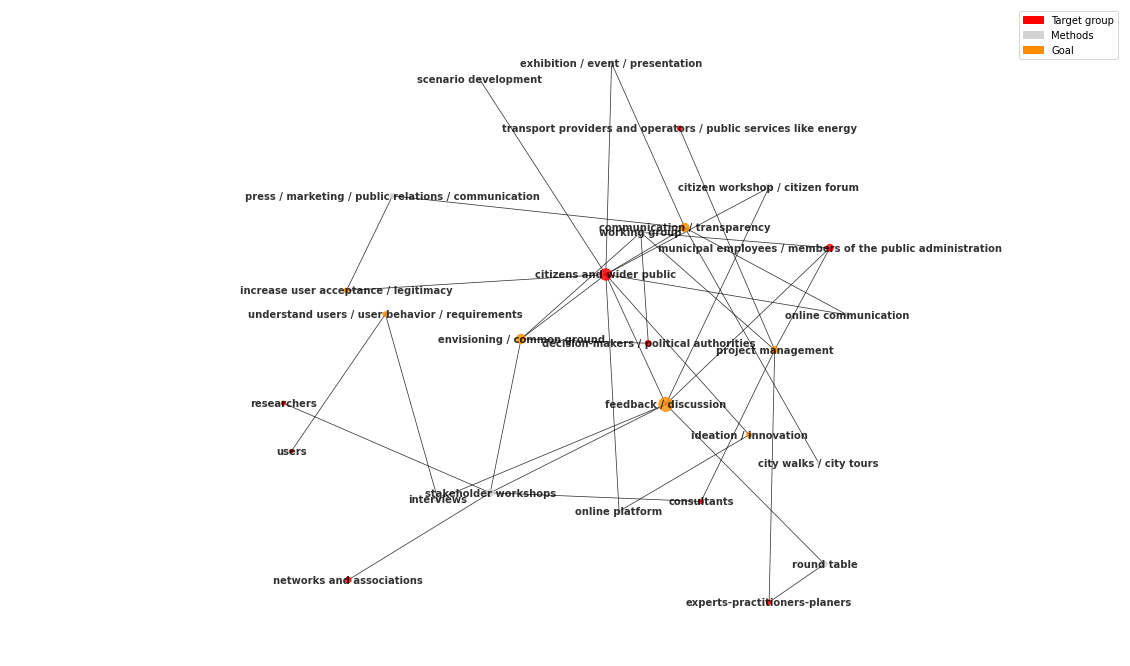

In [68]:
# create the network
fig, ax=plt.subplots(figsize=(20,12))
GA=nx.from_pandas_edgelist(associations_df_edgelist,source='Edge_1',target='Edge_2',create_using=nx.Graph())
# align the node order in the graph with the node datagrame
nodes=nodes.set_index('Node')
nodes=nodes.reindex(GA.nodes())
# Specify colors
color_list = nodes["Color"].tolist()
size_list = nodes["frequency"].tolist()
# nx.draw_spring(GA,with_labels=True, node_size = size_list, node_color=color_list, font_size=10, font_weight="bold", width=0.75, 
#         edgecolors='gray')
nx.draw(GA, with_labels=True, node_size=size_list, node_color=color_list, font_size=10, alpha = 0.8, font_weight="bold", width=0.75, pos=nx.spring_layout(GA, k = 1))

plt.margins(x=0.4)
# add label for node loors
target_group_patch = mpatches.Patch(color='red', label='Target group')
method_patch = mpatches.Patch(color='lightgrey', label='Methods')
goal_patch = mpatches.Patch(color='darkorange', label='Goal')

plt.legend(handles=[target_group_patch, method_patch, goal_patch])
fig1 = plt.gcf()
plt.show()
fig1.savefig('rules_network_SUMP_germany.png')